In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

topic_range = range(2, 11)

In [3]:
tfidf_features = pd.read_csv('./tfidf_features_5000.csv')
tfidf_nochapter = tfidf_features.drop(columns=['chapter'])
tfidf_features.head()

,chapter,aaron,abandon,abandoned,abasing,abel,abhor,abhorrence,abhorrest,abhorreth,...,zenock,zenos,zerahemnah,zeram,zerin,ziff,zion,zoram,zoramite,zoramites
0,1 Nephi 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,1 Nephi 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,1 Nephi 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,1 Nephi 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100003,0.0,0.0
4,1 Nephi 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


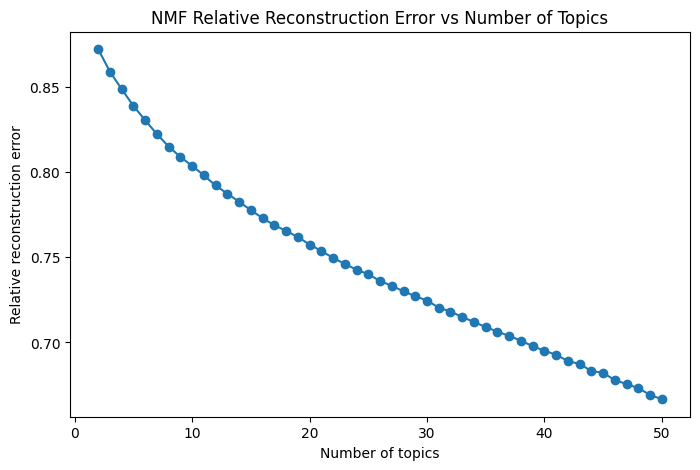

In [ ]:
V = tfidf_nochapter.values  # convert to numpy array if not already
relative_errors = []

for k in range(2, 51):
    model = NMF(n_components=k, max_iter=500, random_state=42)
    W = model.fit_transform(V)
    H = model.components_
    
    # Relative reconstruction error
    rel_error = model.reconstruction_err_ / np.linalg.norm(V, ord='fro')
    relative_errors.append(rel_error)
    # print(f"{k} topics: relative error = {rel_error:.4f}")

# Plot relative error
plt.figure(figsize=(8,5))
plt.plot(list(range(2,51)), relative_errors, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Relative reconstruction error")
plt.title("NMF Relative Reconstruction Error vs Number of Topics")
plt.show()



In [6]:
NMF_model = NMF(n_components=6, random_state=42)
W = NMF_model.fit_transform(tfidf_nochapter)
H = NMF_model.components_

In [ ]:
num_top_words = 10
num_top_chapters = 10

# Column names for the features (excluding 'chapter')
terms = tfidf_nochapter.columns
chapters = tfidf_features['chapter']  # original chapter names

for topic_idx, topic in enumerate(H):
    print(f"Topic {topic_idx + 1}:")
    
    # --- Top words ---
    top_word_indices = topic.argsort()[-num_top_words:][::-1]
    top_words = [terms[i] for i in top_word_indices]
    print("Top words:", ", ".join(top_words))
    
    # --- Top chapters ---
    topic_weights = W[:, topic_idx]
    top_chapter_indices = topic_weights.argsort()[-num_top_chapters:][::-1]
    top_chapters = [chapters[i] for i in top_chapter_indices]
    print("Top chapters:", ", ".join(top_chapters))
    
    print()

# Topic 1: General preaching: Alma's sermons, Amulek's teaching, King Benjamin's address, Mormon's invitation, Moroni's invitation, Jesus teaching
# topic 2: Historical chapters
# topic 3: Isaiah, speaking about israel
# topic 4: war chapters
# topic 5: writings and history of Alma
# topic 6: Recording in the plates, writing

Topic 1:
Top words: ye, unto, behold, god, shall, say, yea, christ, know, things
Top chapters: Alma 5, Alma 34, Mosiah 4, Mosiah 2, Mormon 7, Alma 7, Alma 32, 2 Nephi 32, 3 Nephi 18, Mosiah 5

Topic 2:
Top words: did, came, pass, people, land, year, unto, began, lord, nephi
Top chapters: 4 Nephi 1, Helaman 6, Helaman 11, Mormon 2, Ether 10, 3 Nephi 7, 3 Nephi 2, 1 Nephi 18, Helaman 3, 1 Nephi 16

Topic 3:
Top words: shall, lord, thy, unto, israel, saith, thee, thou, hath, come
Top chapters: 2 Nephi 30, 2 Nephi 21, 3 Nephi 21, 2 Nephi 20, 2 Nephi 23, 1 Nephi 21, 3 Nephi 20, 2 Nephi 24, 2 Nephi 26, 2 Nephi 27

Topic 4:
Top words: lamanites, moroni, city, nephites, land, came, army, armies, did, behold
Top chapters: Alma 52, Alma 62, Alma 53, Alma 43, Alma 49, Alma 59, Alma 51, Alma 55, Alma 58, Alma 56

Topic 5:
Top words: king, people, alma, ammon, land, thou, god, came, said, unto
Top chapters: Alma 17, Alma 18, Mosiah 24, Mosiah 21, Alma 22, Alma 8, Alma 19, Mosiah 25, Mosiah 7, Mosia

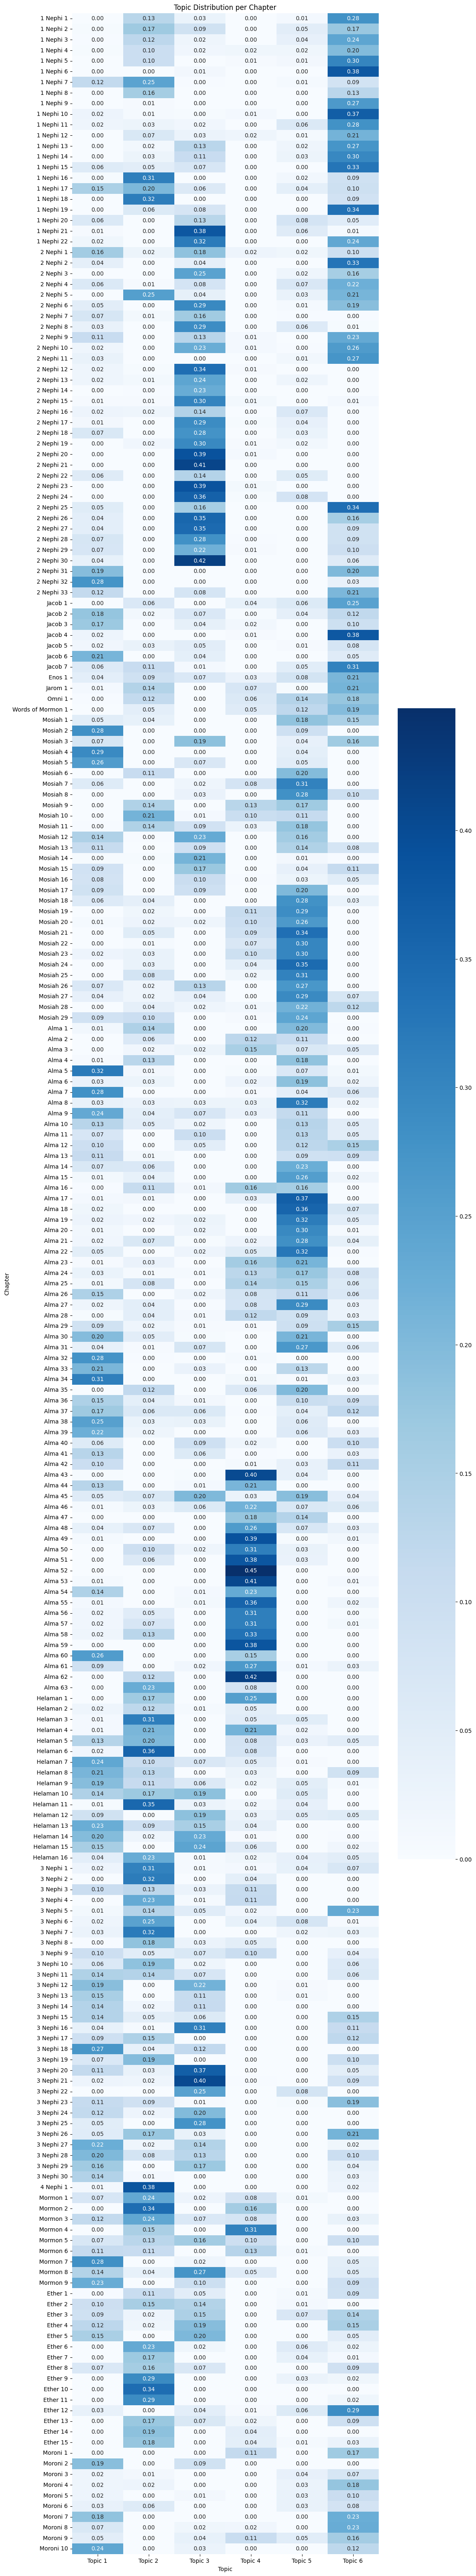

In [31]:
# W is document-topic matrix (chapters x topics)
# chapters is the list of chapter names
# topics = number of topics
num_topics = W.shape[1]

# Create a DataFrame for plotting
df_topics = pd.DataFrame(W, index=chapters, columns=[f"Topic {i+1}" for i in range(num_topics)])

# --- Option 1: Heatmap ---
plt.figure(figsize=(12, 80))
sns.heatmap(df_topics, annot=True, fmt=".2f", cmap="Blues")
plt.title("Topic Distribution per Chapter")
plt.ylabel("Chapter")
plt.xlabel("Topic")
plt.show()

# LDA

In [17]:
count_features = pd.read_csv('./wordcount_features.csv')
count_nochapter = count_features.drop(columns=['chapter'])
count_features.head()

,chapter,aaron,abandon,abandoned,abasing,abel,abhor,abhorrence,abhorrest,abhorreth,...,zenock,zenos,zerahemnah,zeram,zerin,ziff,zion,zoram,zoramite,zoramites
0,1 Nephi 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1 Nephi 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1 Nephi 3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1 Nephi 4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
4,1 Nephi 5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Best number of topics: 6


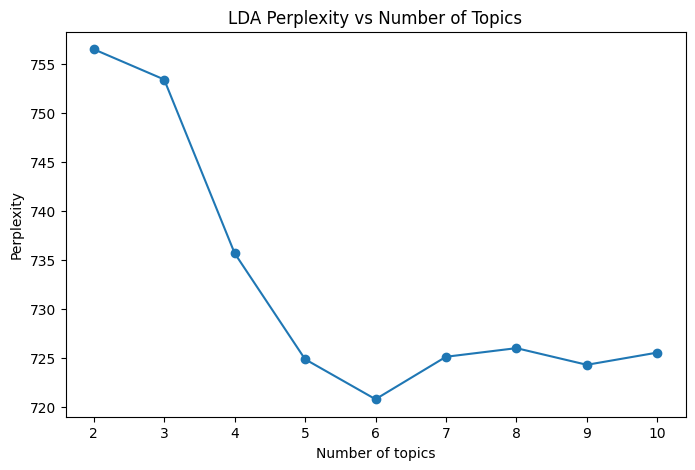

In [18]:
perplexities = []
lda_models = []

for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(count_nochapter)
    lda_models.append(lda)
    perplexities.append(lda.perplexity(count_nochapter))
    # print(f"Fitted LDA with {n_topics} topics, perplexity: {perplexities[-1]:.2f}")
print('Best number of topics:', topic_range[np.argmin(perplexities)])
plt.figure(figsize=(8,5))
plt.plot(list(topic_range), perplexities, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.title("LDA Perplexity vs Number of Topics")
plt.show()


In [26]:
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(count_nochapter)
# --- Step 4: Print topics with top words ---
W = lda.transform(count_nochapter)  # document-topic matrix
H = lda.components_                 # topic-term matrix

for topic_idx, topic in enumerate(H):
    print(f"Topic {topic_idx + 1}:")
    
    # Top words
    top_word_indices = topic.argsort()[-num_top_words:][::-1]
    top_words = [terms[i] for i in top_word_indices]
    print("Top words:", ", ".join(top_words))
    
    # Top chapters
    topic_weights = W[:, topic_idx]
    top_chapter_indices = topic_weights.argsort()[-num_top_chapters:][::-1]
    top_chapters = [chapters[i] for i in top_chapter_indices]
    print("Top chapters:", ", ".join(top_chapters))
    
    print()

Topic 1:
Top words: son, thy, church, lamoni, unto, lord, thee, order, jared, middoni
Top chapters: Ether 1, Moroni 3, Alma 20, Moroni 5, Alma 13, Moroni 4, Alma 4, Alma 46, Alma 6, Moroni 6

Topic 2:
Top words: unto, ye, god, yea, behold, shall, say, thou, things, people
Top chapters: Alma 32, Alma 12, Mosiah 4, Alma 42, Alma 39, Alma 41, Alma 29, Alma 38, Alma 34, Mosiah 16

Topic 3:
Top words: unto, shall, ye, behold, god, things, father, lord, wherefore, came
Top chapters: 2 Nephi 25, 3 Nephi 28, 3 Nephi 11, Helaman 14, 3 Nephi 19, Moroni 10, Moroni 8, 3 Nephi 27, 2 Nephi 31, Jacob 4

Topic 4:
Top words: did, came, pass, people, land, lamanites, unto, nephites, behold, yea
Top chapters: Alma 62, Alma 52, Alma 51, Ether 10, Alma 57, Helaman 1, Alma 49, Ether 14, Helaman 4, Alma 53

Topic 5:
Top words: shall, lord, unto, thy, thou, ye, behold, people, thee, come
Top chapters: Jacob 5, 1 Nephi 21, 2 Nephi 8, 2 Nephi 15, 2 Nephi 20, 2 Nephi 17, 1 Nephi 20, 2 Nephi 12, 2 Nephi 13, 2 Nep

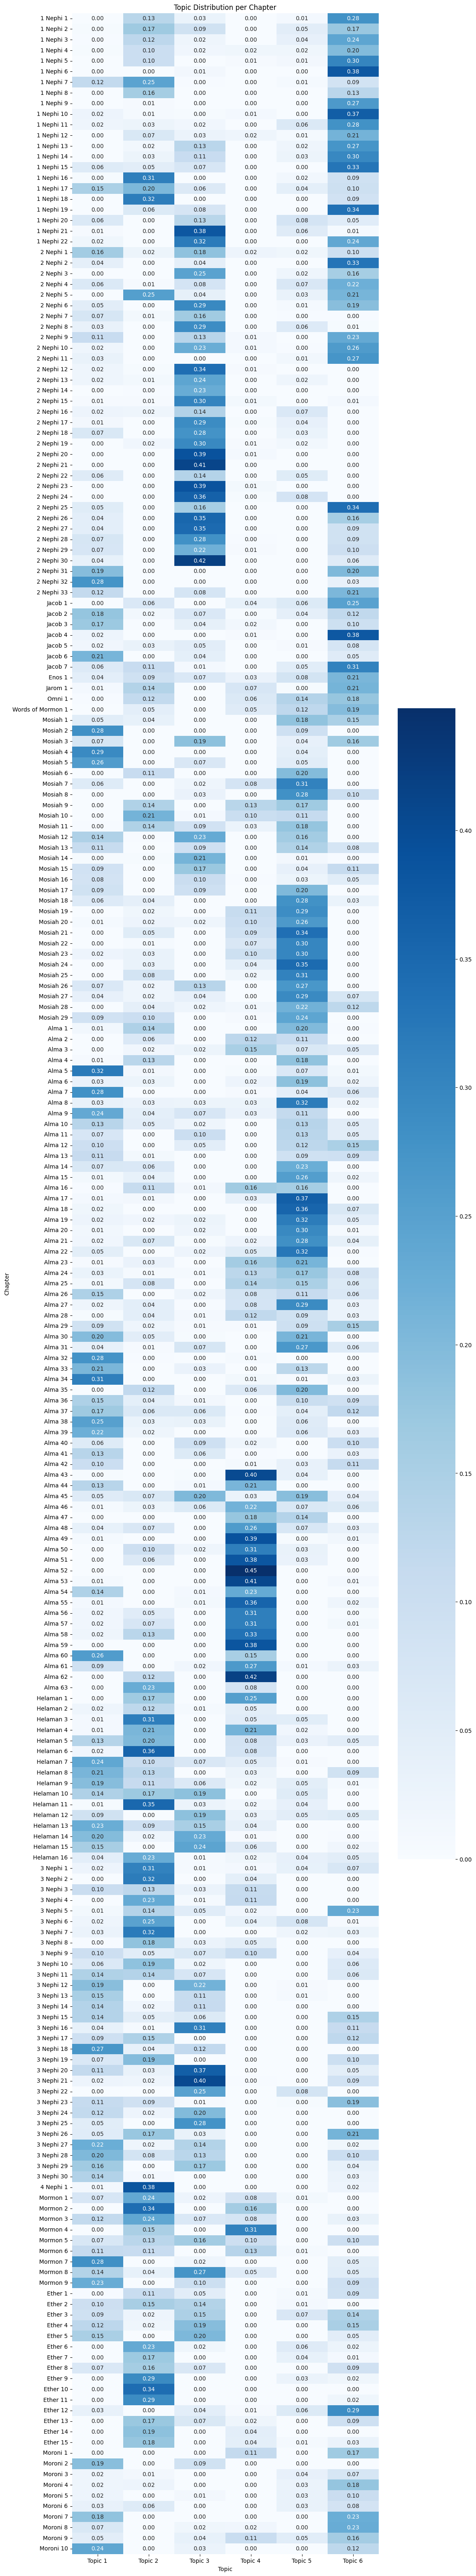

In [30]:
# W is document-topic matrix (chapters x topics)
# chapters is the list of chapter names
# topics = number of topics
num_topics = W.shape[1]

# Create a DataFrame for plotting
df_topics = pd.DataFrame(W, index=chapters, columns=[f"Topic {i+1}" for i in range(num_topics)])

# --- Option 1: Heatmap ---
plt.figure(figsize=(12, 80))
sns.heatmap(df_topics, annot=True, fmt=".2f", cmap="Blues")
plt.title("Topic Distribution per Chapter")
plt.ylabel("Chapter")
plt.xlabel("Topic")
plt.show()